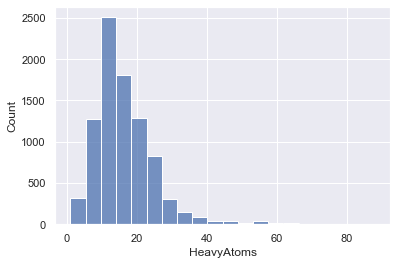

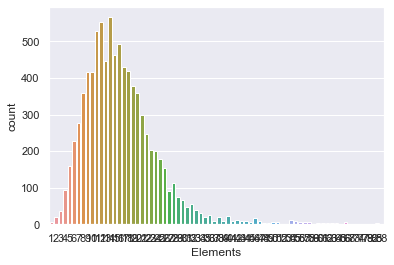

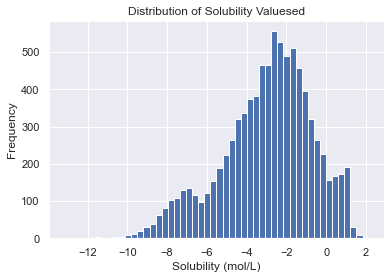

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt

data = pd.read_csv("curated-solubility-dataset.csv")

# Check if a compound is organic
def Organic(mol):
    # Get the set of elements in the compound
    elements = set([atom.GetSymbol() for atom in mol.GetAtoms()])
    
    return elements.issubset(set(['B','C','N','O','P','S','F','Cl','Br','I']))

# Check if a compound is a mixture
def Mixture(mol):
    # Check if the SMILES contains a dot
    return "." in mol

# Check if a compound has more than 100 heavy atoms
def Maxheavyatoms(mol):
    heavy_atoms = mol.GetNumHeavyAtoms()

    return heavy_atoms > 100

# Filter the data:
# Remove mixtures
filtered_data = data[data["SMILES"].apply(lambda x: not Mixture(x))] 

# Remove inorganic compounds
filtered_data = filtered_data[filtered_data["SMILES"].apply(lambda x: Organic(Chem.MolFromSmiles(x)))] 

# Remove compounds with more than 100 heavy atoms
filtered_data = filtered_data[filtered_data["SMILES"].apply(lambda x: not Maxheavyatoms(Chem.MolFromSmiles(x)))] 




#Task2


# Counting the asked quantities:

filtered_data['Mol'] = filtered_data['SMILES'].apply(Chem.MolFromSmiles) # Create molecule objects from SMILES

filtered_data['HeavyAtoms'] = filtered_data['Mol'].apply(Chem.rdchem.Mol.GetNumHeavyAtoms) # Get number of heavy atoms
def countAtoms(mol):
    return mol.GetNumAtoms()
filtered_data['Elements'] = filtered_data['Mol'].apply(countAtoms) # Get number of elements
def countBonds(mol):
    return mol.GetNumAromaticRings()
#filtered_data['DoubleBonds'] = filtered_data['Mol'].apply(countBonds) # Get number of bonds
def countRings(mol):
    r = mol.GetRingInfo()
    n = r.NumRings
    return n
filtered_data['Rings'] = filtered_data['Mol'].apply(countRings) # Get number of rings

#print(filtered_data['Rings'])

# Plot histogram for number of heavy atoms
sns.histplot(data=filtered_data, x='HeavyAtoms', bins=20) 
plt.show()

# Plot histogram for number of double bonds
#sns.histplot(data=filtered_data, x='DoubleBonds', bins=10) 
# Plot bar chart for number of rings
#sns.countplot(data=filtered_data, x='Rings') 

# Plot bar chart for element counts
sns.countplot(data=filtered_data, x='Elements') 
plt.show()


# Get the solubility values from the data
solubility = filtered_data["Solubility"]

plt.hist(solubility, bins=50)
plt.xlabel("Solubility (mol/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Solubility Valuesed")
plt.show()




